### Task1. Finding similarities between models

In this notebook we will compute the jaccard similarity for cutoff 20 for every prediction type.

I've used data, generated in `generate_results.ipynb`. It computes cutoff 50, so here, the cutoff 20 simply selected using slice.

All the results also were stored into the corresponding `result_experiment` folder.
`jaccard_similarity.png` contains the heatmap and `jaccard_similarity.tex` contains table in LaTeX format.

#### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Helpers

In [2]:
def jaccard(list1, list2) -> float:
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    similarity = intersection / union
    return similarity

#### Jaccard similarity computation

In [3]:
experiments_metadata = [
    {
        "conf_name": "SIGIR",
        "algorithm_name": "CMN",
        "datasets": ["citeulike"]
    },
    {
        "conf_name": "RecSys",
        "algorithm_name": "SpectralCF",
        "datasets": ["movielens1m_ours", "amazon_instant_video"]
    }
]

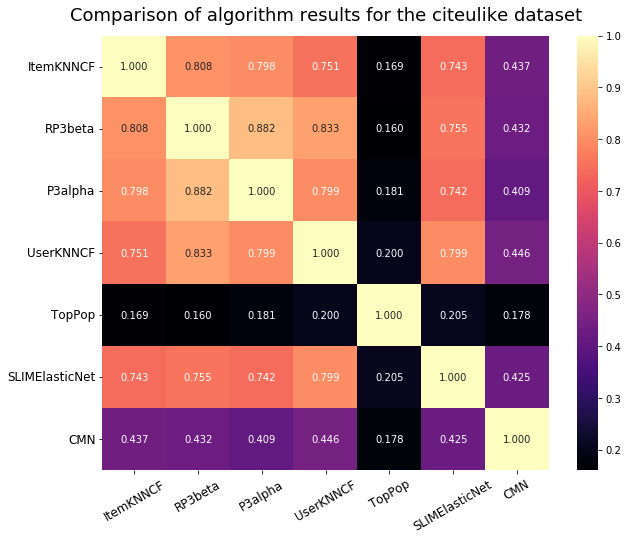

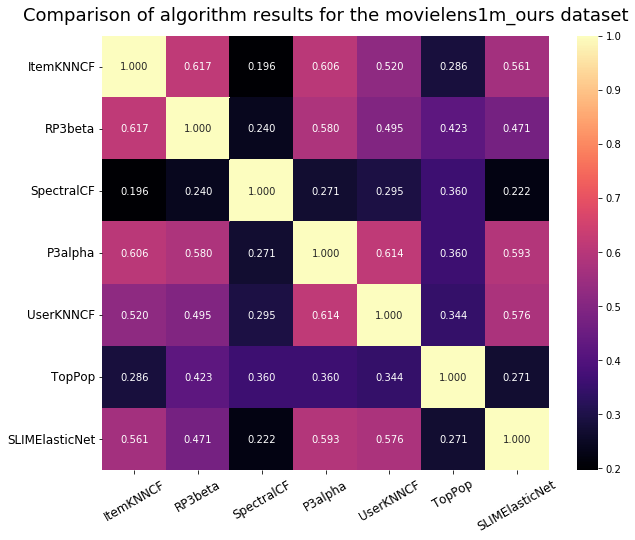

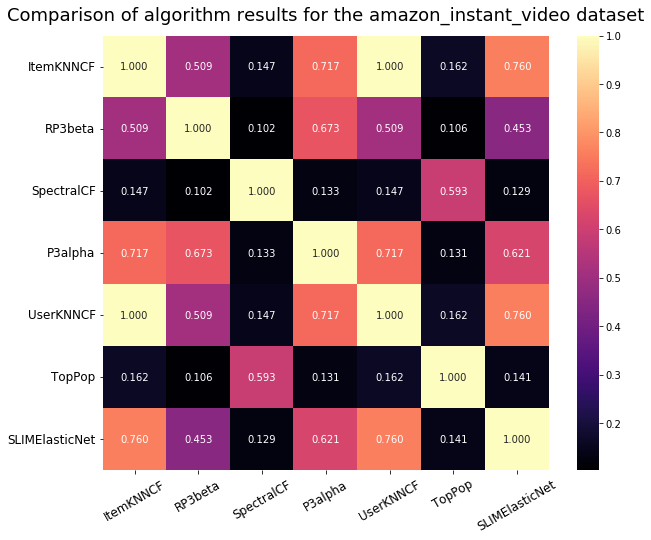

In [4]:
def generate_results(conf_name, algorithm_name, dataset_name):
    path_to_results = f'result_experiments/{conf_name}/{algorithm_name}_{dataset_name}/'

    algorithms = []
    recommendations = []

    for file_name in os.listdir(path_to_results):
        if file_name.endswith('.csv'):
            algorithm = file_name.split('.')[0].replace("_RecommenderWrapper", "").replace("Recommender", "")
            algorithms.append(algorithm)
            recommendations.append(pd.read_csv(path_to_results + file_name))

    result_df = pd.DataFrame(columns=algorithms, index=algorithms, dtype=float)

    for i in range(len(algorithms)):
        for j in range(i, len(algorithms)):
            if i == j:
                result_df.loc[algorithms[i]][algorithms[j]] = 1
            else:
                lst = [
                    jaccard(recommendations[i].iloc[k][:20], recommendations[j].iloc[k][:20])
                    for k in range(len(algorithms))
                ]
                result_df.loc[algorithms[i]][algorithms[j]] = np.mean(lst)
                result_df.loc[algorithms[j]][algorithms[i]] = result_df.loc[algorithms[i]][algorithms[j]]

    result_df.to_latex(path_to_results + 'jaccard_similarity.txt')

    plt.figure(figsize=(10, 8))
    plt.title(f"Comparison of algorithm results for the {dataset_name} dataset", fontsize=18, pad=15)
    heatmap = sns.heatmap(data=result_df, annot=True, fmt='.3f', cmap="magma")
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30, fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
    plt.savefig(path_to_results + 'jaccard_similarity.png')
    plt.show()



results = []
for experiment in experiments_metadata:
    for dataset_name in experiment["datasets"]:
        conf_name = experiment["conf_name"]
        algorithm_name = experiment["algorithm_name"]
        results.append(generate_results(conf_name, algorithm_name, dataset_name))